# Cognifyz Internship Project

In [718]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Load Dataset

In [719]:
dataset = pd.read_csv('Dataset\Dataset .csv')

In [720]:
pd.set_option('display.max_columns', None)
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Level 1: Task 1: Data Exploration and Preprocessing

1). Explore the dataset and identify the number of rows and columns.

2). Check for missing values in each column and handle them accordingly.

3). Perform data type conversion if necessary. Analyze the distribution of the target variable
("Aggregate rating") and identify any class imbalances.


In [721]:
# Check Rows & Columns in dataset
dataset.shape

(9551, 21)

In [722]:
# Check the Null values Present in dataset
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [723]:
# Drop the Null values
dataset.dropna(inplace=True)

In [724]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [725]:
# Copy the dataset in df variable
df = dataset.copy()

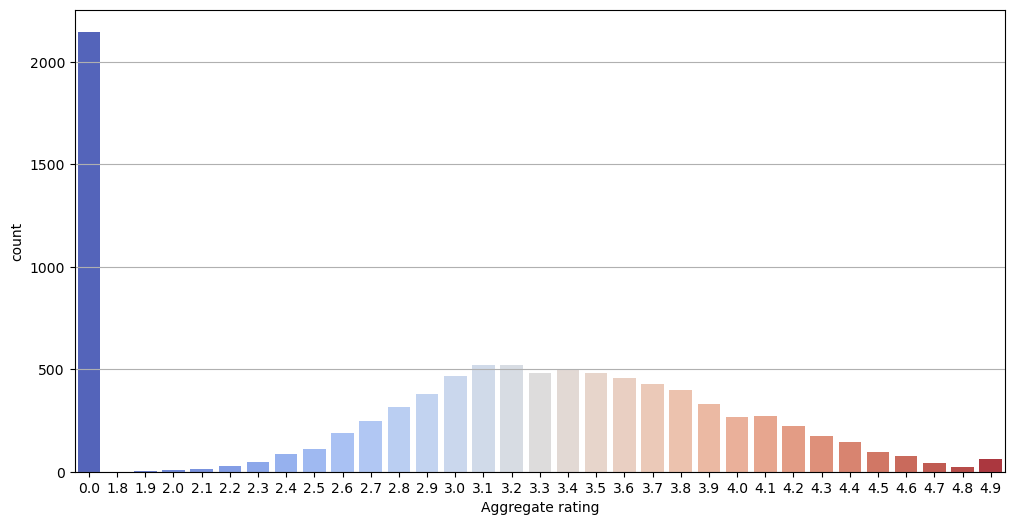

In [726]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'Aggregate rating',palette='coolwarm')
plt.grid(axis='y')
plt.show()

In [727]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [728]:
df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [729]:
df.drop(df[(df['Aggregate rating'] == 0.0) & (df['Rating text'] == 'Not rated')].index, inplace=True)


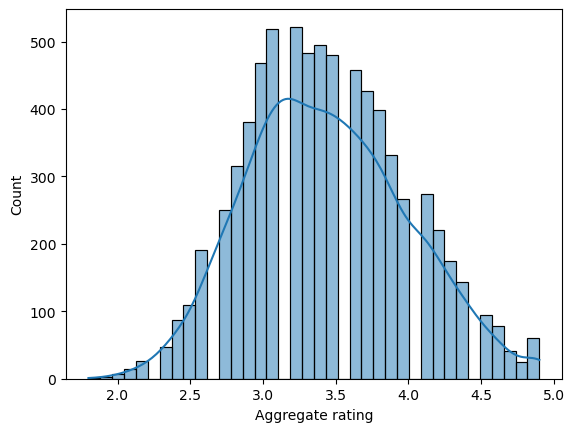

In [730]:
sns.histplot(data=df,x='Aggregate rating',kde=True)
plt.show()

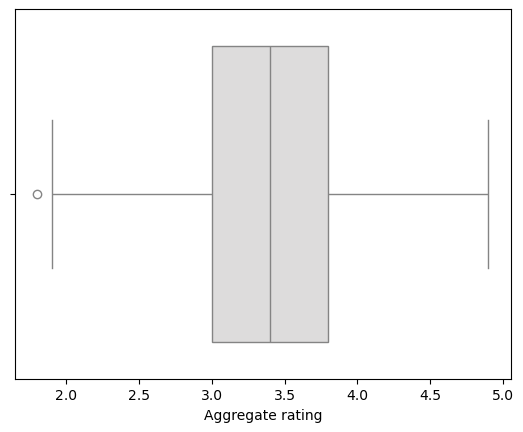

In [731]:
sns.boxplot(data=df,x='Aggregate rating',palette='coolwarm')
plt.show()

In [732]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Aggregate rating'].quantile(0.25)
Q3 = df['Aggregate rating'].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_cleaned = df[(df['Aggregate rating'] >= lower_bound) & (df['Aggregate rating'] <= upper_bound)]

# Display shape before and after
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)


Original shape: (7394, 21)
Cleaned shape: (7393, 21)


Level 1: Task 2: Descriptive Analysis

1). Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

2). Explore the distribution of categorical variables like "Country Code", "City" and "Cuisines".

3). Identify the top cuisines and cities with the highest number of restaurants.

In [733]:
numerical_feature = ['Average Cost for two','Price range','Aggregate rating','Votes']

In [734]:
for i in numerical_feature:
    print(f'Mean of {i}: {df[i].mean()}')

Mean of Average Cost for two: 1450.1578306735191
Mean of Price range: 1.9705166351095482
Mean of Aggregate rating: 3.439505004057344
Mean of Votes: 202.06248309440087


In [735]:
for i in numerical_feature:
    print(f'Median of {i}: {df[i].median()}')

Median of Average Cost for two: 500.0
Median of Price range: 2.0
Median of Aggregate rating: 3.4
Median of Votes: 60.0


In [736]:
for i in numerical_feature:
    print(f'Mode of {i}: {df[i].mode()[0]}')

Mode of Average Cost for two: 500
Mode of Price range: 1
Mode of Aggregate rating: 3.2
Mode of Votes: 4


In [737]:
for i in numerical_feature:
    print(f'standard deviation of {i}: {df[i].std()}')

standard deviation of Average Cost for two: 18314.593715652132
standard deviation of Price range: 0.9305355840652373
standard deviation of Aggregate rating: 0.5521291116884451
standard deviation of Votes: 479.3056095278667


In [738]:
# Country Name According to Country Code 

list_of_country = {1:'India',216:'US',215:'UK',30:'Brazil',214:'UAE',189:'South Africa',
                   148:'New Zealand',208:'Turkey',14:'Australia',162:'Philippines',94:'Indonesia',
                   184:'Singapore',166:'Qatar',191:'Sri Lanka',37:'Canada'}

df['Country_name'] = df['Country Code'].map(list_of_country)

In [739]:
df['Country_name'].value_counts()

Country_name
India           6513
US               422
UK                79
UAE               60
South Africa      60
Brazil            55
New Zealand       40
Turkey            34
Australia         24
Philippines       22
Indonesia         21
Singapore         20
Qatar             20
Sri Lanka         20
Canada             4
Name: count, dtype: int64

In [740]:
df['City'].value_counts().head(5)

City
New Delhi    4048
Gurgaon       890
Noida         696
Faridabad     151
Ghaziabad      23
Name: count, dtype: int64

In [741]:
df['Restaurant Name'].value_counts().head(10)

Restaurant Name
Domino's Pizza      74
Cafe Coffee Day     67
Subway              61
McDonald's          47
Green Chick Chop    44
Pizza Hut           29
Keventers           29
Barbeque Nation     26
Giani               24
Barista             21
Name: count, dtype: int64

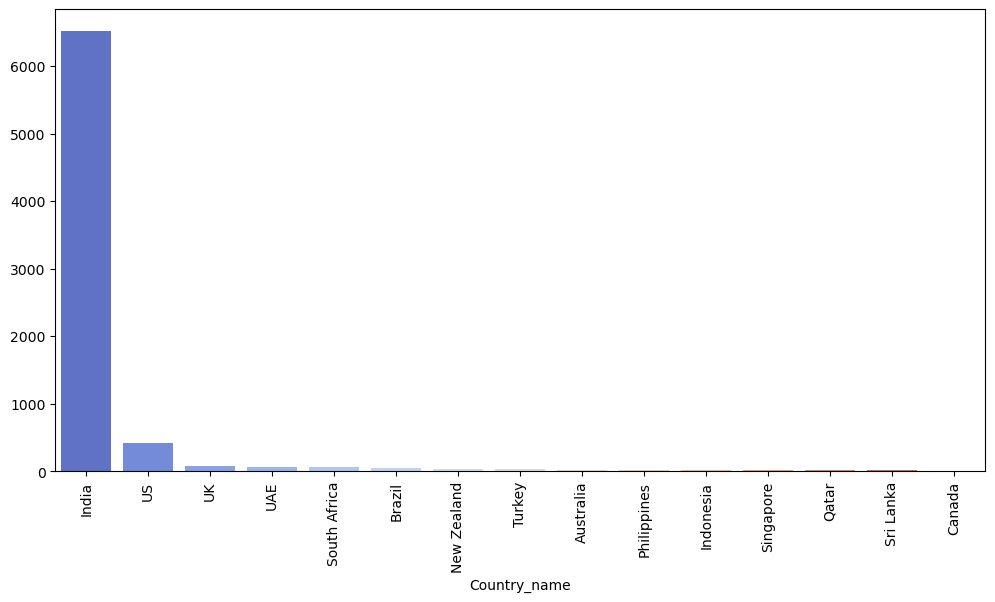

In [742]:
count_contry = df['Country_name'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count_contry.index,y=count_contry.values,palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

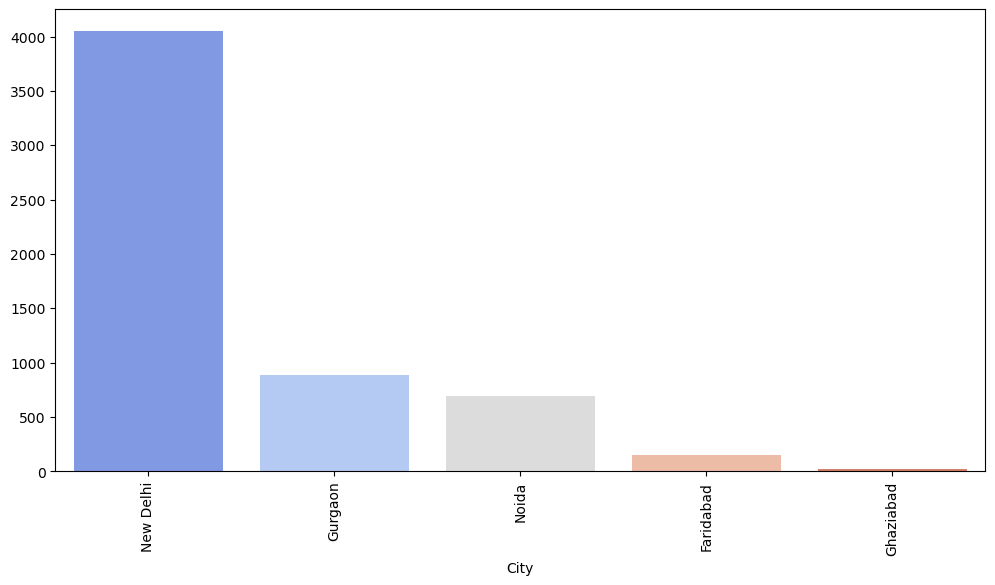

In [743]:
city_count = df['City'].value_counts().head(5)
plt.figure(figsize=(12,6))
sns.barplot(x=city_count.index, y = city_count.values,palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

In [744]:
cuisine_series=df['Cuisines'].dropna().apply(lambda x: [c.strip() for c in x.split(', ')])
all_cuisines = cuisine_series.explode()

In [745]:
all_cuisines.value_counts().head(10)

Cuisines
North Indian    3017
Chinese         2184
Fast Food       1563
Mughlai          794
Italian          726
Continental      699
Cafe             634
Desserts         543
Bakery           536
South Indian     485
Name: count, dtype: int64

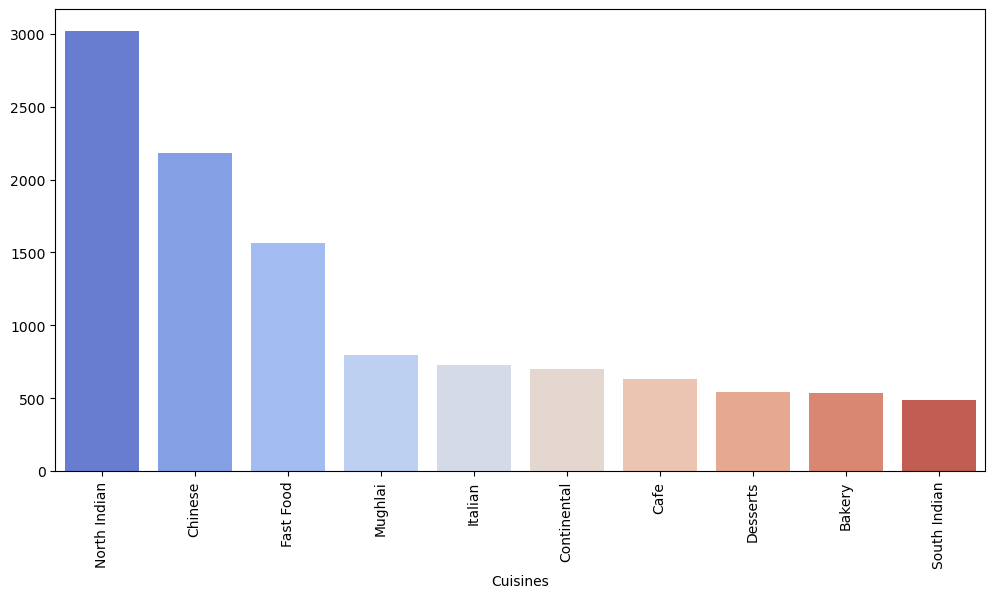

In [746]:
count_cuisines=all_cuisines.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=count_cuisines.index,y=count_cuisines.values,palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

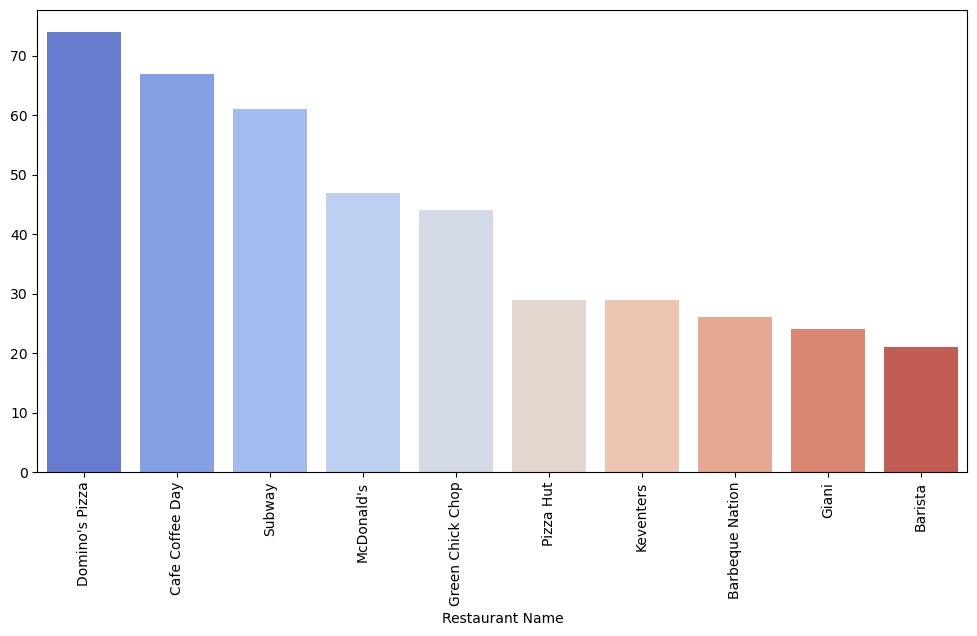

In [747]:
count_restaurants= df['Restaurant Name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=count_restaurants.index, y=count_restaurants.values,palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Level 2: Task 1: Table Booking and Online Delivery

1). Determine the percentage of restaurants that offer table booking and online delivery.

2). Compare the average ratings of restaurants with table booking and those without.

3). Analyze the availability of online delivery among restaurants with different price ranges.

In [748]:
pd.DataFrame(df['Has Table booking'].value_counts()/len(df['Has Table booking'])*100)

,count
Has Table booking,
No,84.974303
Yes,15.025697


In [749]:
pd.DataFrame(df['Has Online delivery'].value_counts()/len(df['Has Online delivery'])*100)

,count
Has Online delivery,
No,68.149851
Yes,31.850149


In [750]:
Avg_rating_yes = df[df['Has Table booking']=='Yes']['Aggregate rating'].mean()
Avg_rating_no = df[df['Has Table booking']=='No']['Aggregate rating'].mean()

print(f'Average Rating of Table booking has "Yes": {round(Avg_rating_yes,2)}')
print(f'Average Rating of Table booking has "No": {round(Avg_rating_no,2)}')

Average Rating of Table booking has "Yes": 3.59
Average Rating of Table booking has "No": 3.41


In [751]:
pd.DataFrame(df.groupby('Price range')['Has Online delivery'].value_counts())

count
Price range Has Online delivery       
1           No                    2090
            Yes                    648
2           No                    1466
            Yes                   1245
3           No                     961
            Yes                    409
4           No                     522
            Yes                     53

Level 2: Task 2: Price Range Analysis

1). Determine the most common price range among all the restaurants.

2). Calculate the average rating for each price range.

3). Identify the color that represents the highest average rating among different price ranges.

In [752]:
Price_range_count=df['Price range'].value_counts()

print(f"The most common Price Range among all the restaurants: {df['Price range'].mode()[0]}")

pd.DataFrame(Price_range_count)


The most common Price Range among all the restaurants: 1


,count
Price range,
1,2738
2,2711
3,1370
4,575


In [753]:
avg_rating_price = df.groupby('Price range')['Aggregate rating'].mean().sort_index()
pd.DataFrame(round(avg_rating_price,1))

,Aggregate rating
Price range,
1,3.2
2,3.4
3,3.8
4,3.9


In [754]:
pd.DataFrame(df.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean())

Aggregate rating
Price range Rating color                  
1           Dark Green            4.667742
            Green                 4.157639
            Orange                3.039894
            Red                   2.293548
            Yellow                3.661056
2           Dark Green            4.627536
            Green                 4.159385
            Orange                3.048491
            Red                   2.300000
            Yellow                3.671159
3           Dark Green            4.646032
            Green                 4.168675
            Orange                3.097764
            Red                   2.305000
            Yellow                3.715726
4           Dark Green            4.709459
            Green                 4.188144
            Orange                3.162376
            Red                   2.283333
            Yellow                3.716000

Level 2: Task 3: Feature Engineering

1). Extract additional features from the existing columns, such as the length of the restaurant name or address.

2). Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [755]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [756]:
currency_to_inr = {
    'Indian Rupees(Rs.)': 1,
    'Dollar($)': 83,             
    'Pounds(��)': 105,            
    'Emirati Diram(AED)': 22.6,
    'Brazilian Real(R$)': 16.5,
    'NewZealand($)': 51,
    'Botswana Pula(P)': 6,
    'Rand(R)': 4.5,
    'Sri Lankan Rupee(LKR)': 0.26,
    'Turkish Lira(TL)': 2.6,
    'Qatari Rial(QR)': 22.7,
    'Indonesian Rupiah(IDR)': 0.0052,
    'Singapore($)': 62,
    'Canadian($)': 61,
    'Dollar($)': 83,             
    'Philippine Peso(P)': 1.48,
    'Australian($)': 55
}
df['Average Cost for two (INR)'] = df.apply(lambda row: row['Average Cost for two'] * currency_to_inr.get(row['Currency'], 1), axis=1)

In [757]:
df['log_votes'] = np.log1p(df['Votes'])

In [758]:
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [759]:
df['votes_online_interaction']=(df['Votes']) * (df['Has Online Delivery'])

In [760]:
df['Average Cost for two (INR)'] = df.apply(lambda row: row['Average Cost for two'] * currency_to_inr.get(row['Currency'], 1), axis=1)
df['Average Cost for one (INR)']=df['Average Cost for two (INR)']/2

In [761]:
df['cost_booking_interaction']=(df['Average Cost for one (INR)']) * (df['Has Table Booking'])

In [762]:
df['restaurant_name_length'] = df['Restaurant Name'].str.len()
df['address_length'] = df['Address'].str.len()

In [763]:
df['Num Cuisines'] = df['Cuisines'].fillna('').apply(lambda x: len(x.split(',')))
name_counts = df['Restaurant Name'].value_counts()
df['Is Chain'] = df['Restaurant Name'].map(lambda x: 1 if name_counts[x] > 1 else 0)


Level 3: Task 1: Predictive Modeling

1). Build a regression model to predict the aggregate rating of a restaurant based on available features.

2). Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

3). Experiment with different algorithms (e.g.linear regression, decision trees, random forest) and compare their performance.

In [764]:
Label = ['Rating text']

In [765]:
from sklearn.preprocessing import LabelEncoder

for i in Label:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [766]:
df= pd.get_dummies(df, columns=['Country_name','Rating color'], drop_first=True)

In [767]:
scaler = ['Average Cost for two (INR)',
 'Average Cost for one (INR)',
 'cost_booking_interaction',
 'restaurant_name_length',
 'address_length']

In [768]:
from sklearn.preprocessing import MinMaxScaler

for i in scaler:
    min_max_scaler = MinMaxScaler()
    df[i] = min_max_scaler.fit_transform(df[[i]])

In [769]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating text', 'Votes',
       'Average Cost for two (INR)', 'log_votes', 'Has Table Booking',
       'Has Online Delivery', 'votes_online_interaction',
       'Average Cost for one (INR)', 'cost_booking_interaction',
       'restaurant_name_length', 'address_length', 'Num Cuisines', 'Is Chain',
       'Country_name_Brazil', 'Country_name_Canada', 'Country_name_India',
       'Country_name_Indonesia', 'Country_name_New Zealand',
       'Country_name_Philippines', 'Country_name_Qatar',
       'Country_name_Singapore', 'Country_name_South Africa',
       'Country_name_Sri Lanka', 'Country_name_Turkey', 'Country_name_UAE',
       'Country_name_UK', 'Country_na

In [770]:
X = df.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu','Aggregate rating','Votes',
       'restaurant_name_length', 'address_length'], axis=1)

In [771]:
y = df['Aggregate rating']

In [772]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [773]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [774]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Knn": KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=5),
        "XGBoost": XGBRegressor()
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Model": name,
            "MAE": round(mae, 4),
            "MSE": round(mse, 4),
            "RMSE": round(rmse, 4),
            "R² Score": round(r2*100,2)
        })

    return pd.DataFrame(results).sort_values(by="R² Score", ascending=False)

In [775]:
results_df = evaluate_models(X_train, X_test, y_train, y_test)
print(results_df)

               Model     MAE     MSE    RMSE  R² Score
3      Random Forest  0.1522  0.0355  0.1885     88.52
0  Linear Regression  0.1534  0.0365  0.1912     88.20
4            XGBoost  0.1548  0.0385  0.1961     87.58
2      Decision Tree  0.1869  0.0657  0.2563     78.78
1                Knn  0.2022  0.0869  0.2948     71.94


Level 3: Task 2: Customer Preference Analysis

1). Analyze the relationship between the type of cuisine and the restaurant's rating.

2). Identify the most popular cuisines among customers based on the number of votes.

3). Determine if there are any specific cuisines that tend to receive higher ratings.

In [776]:
df['Cuisines'] = df['Cuisines'].str.split(', ')
df_exploded = df.explode(column='Cuisines')

cuisine_stats = df_exploded.groupby('Cuisines').agg(
    Avg_Rating=('Aggregate rating', 'mean'),
    Count=('Cuisines', 'count')
).sort_values(by='Avg_Rating', ascending=False)

popular_cuisines = cuisine_stats[cuisine_stats['Count'] >= 50]
print("Top cuisines by average rating:\n", popular_cuisines.head(10))

Top cuisines by average rating:
                Avg_Rating  Count
Cuisines                        
Indian           4.156061     66
Sandwich         4.066038     53
Mediterranean    4.020000    110
Steak            3.985484     62
Sushi            3.973333     75
European         3.964384    146
Seafood          3.929825    171
Asian            3.898684    228
Mexican          3.872989    174
Japanese         3.825373    134


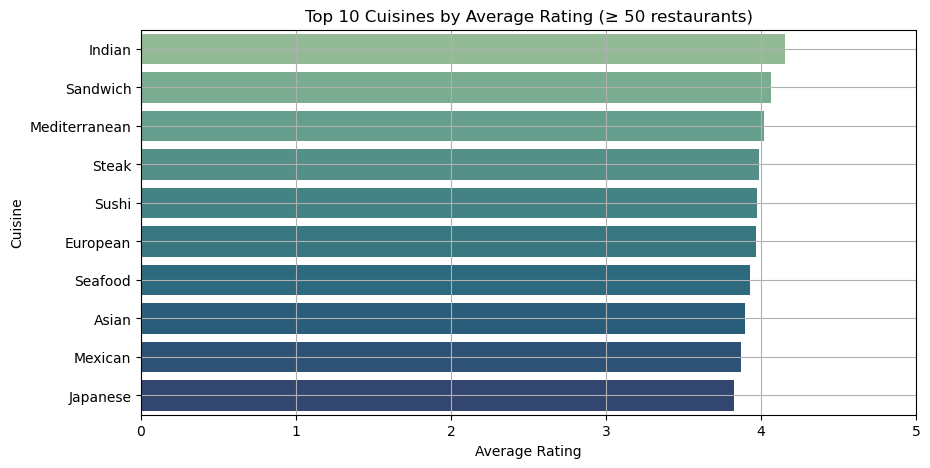

In [777]:
top_rated = popular_cuisines.sort_values('Avg_Rating', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated['Avg_Rating'], y=top_rated.index, palette='crest')
plt.title("Top 10 Cuisines by Average Rating (≥ 50 restaurants)")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.xlim(0, 5)
plt.grid(True)
plt.show()


In [778]:
df_exploded.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)


Cuisines
North Indian    595194
Chinese         363890
Italian         329230
Continental     288213
Fast Food       183665
American        183106
Cafe            177494
Mughlai         151784
Desserts        105781
Asian           104298
Name: Votes, dtype: int64

Level 3: Task 3: Data Visualization

1). Create visualizations to represent the distribution of ratings using different charts (histogram, barplot etc.).

2). Compare the average ratings of different cuisines or cities using appropriate visualizations.

3). Visualize the relationship between various features and the target variable to gain insights.

In [779]:
df['Aggregate rating']

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 7394, dtype: float64

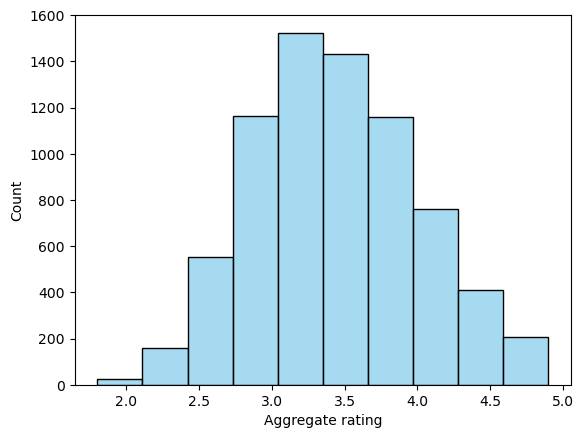

In [780]:
sns.histplot(data = df, x = 'Aggregate rating', bins=10, color='skyblue')
plt.show()

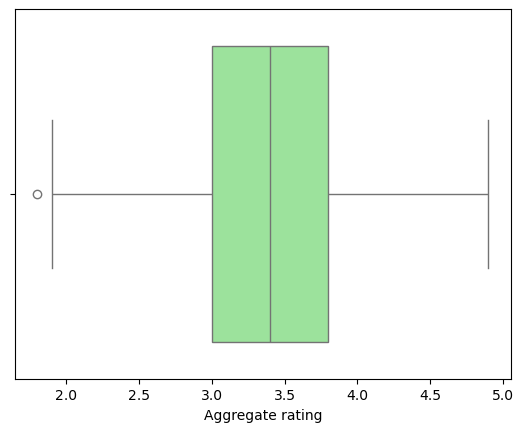

In [781]:
sns.boxplot(data = df, x = 'Aggregate rating', color='lightgreen')
plt.show()

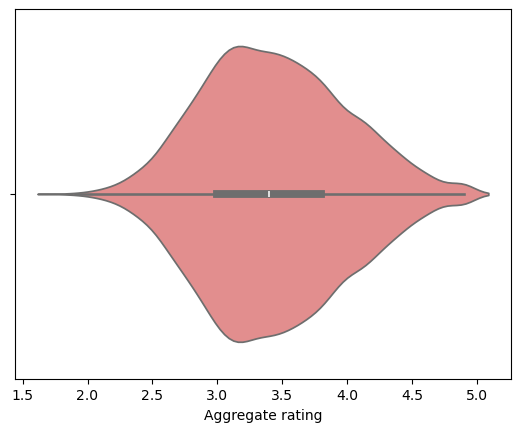

In [782]:
sns.violinplot(data = df, x = 'Aggregate rating', color='lightcoral')
plt.show()

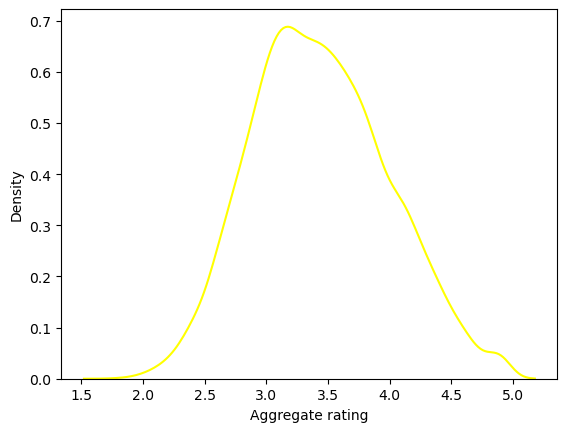

In [783]:
sns.kdeplot(data = df, x = 'Aggregate rating', color='yellow')
plt.show()

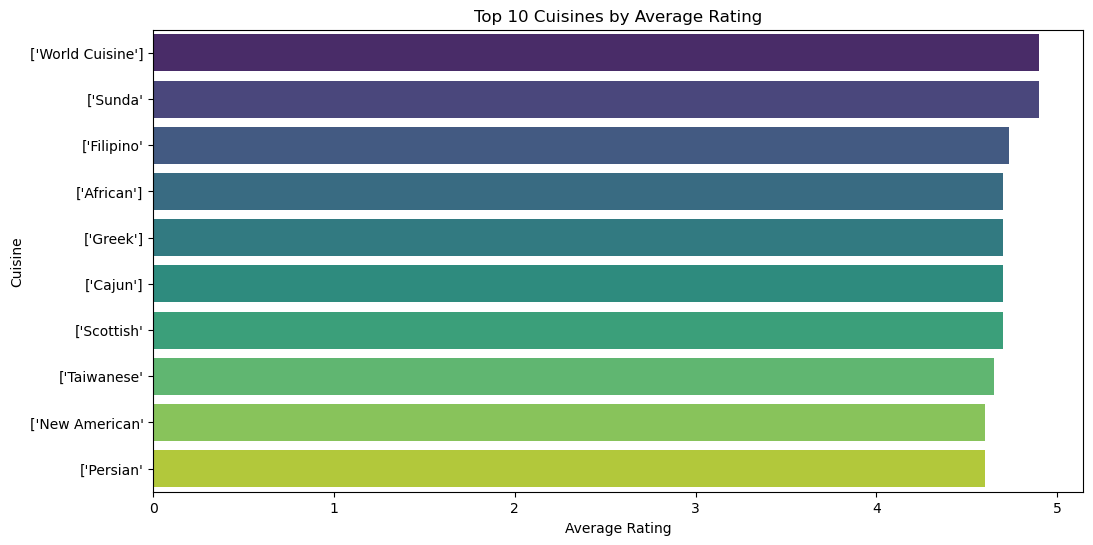

In [ ]:
df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: str(x).split(',')[0].strip())

cuisine_avg = df.groupby('Primary Cuisine')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_avg.values, y=cuisine_avg.index, palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


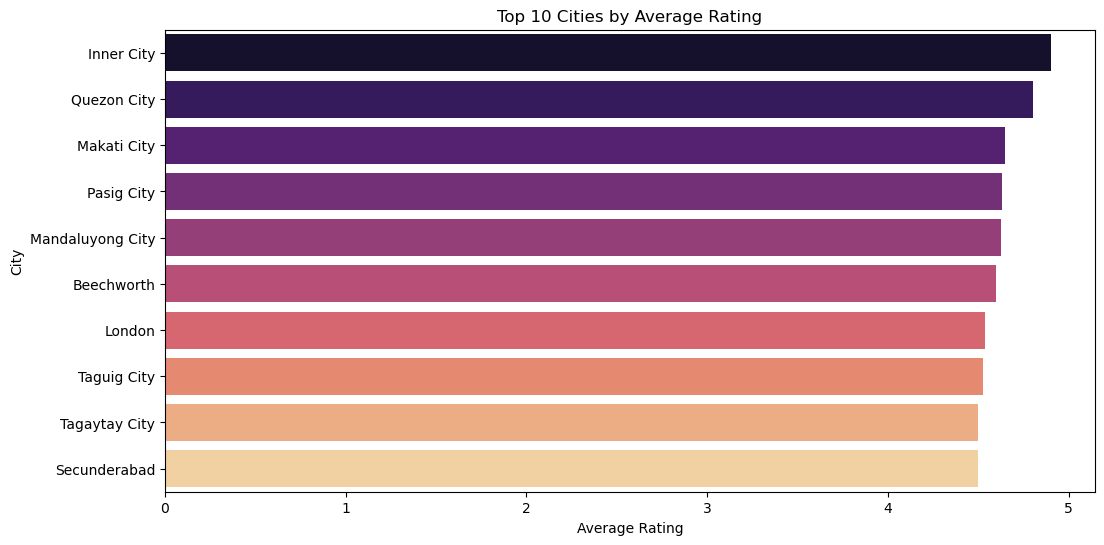

In [ ]:
city_avg = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_avg.values, y=city_avg.index, palette='magma')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


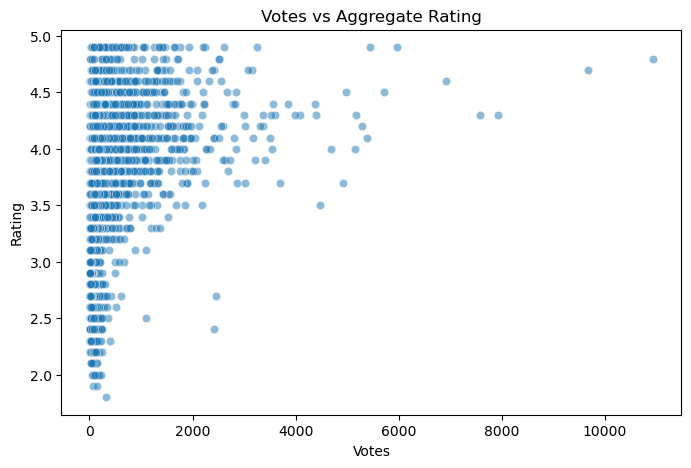

In [787]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.5)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

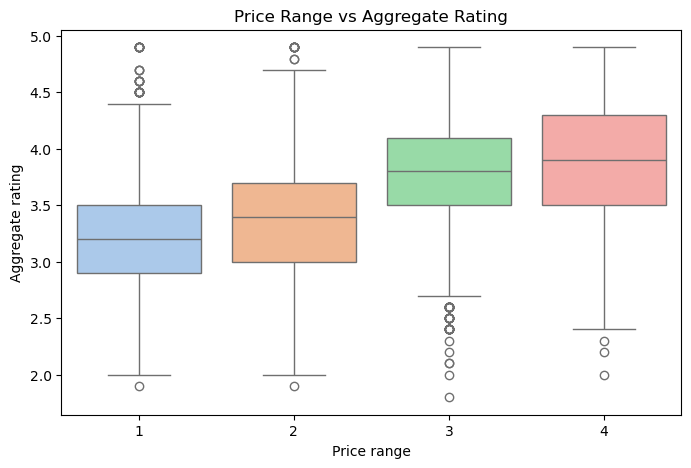

In [788]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Price range', y='Aggregate rating', palette='pastel')
plt.title('Price Range vs Aggregate Rating')
plt.show()

<Figure size 800x500 with 0 Axes>

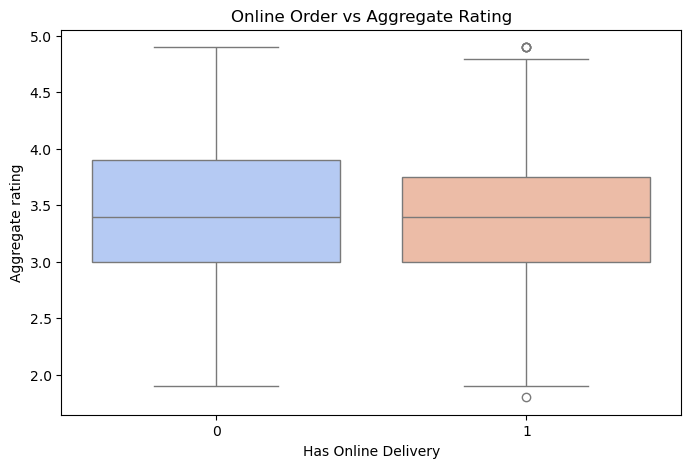

In [790]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Has Online Delivery', y='Aggregate rating', palette='coolwarm')
plt.title('Online Order vs Aggregate Rating')
plt.show()


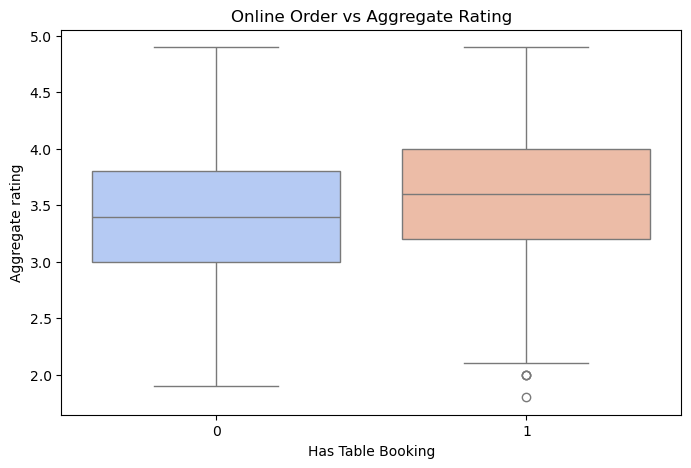

In [792]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Has Table Booking', y='Aggregate rating', palette='coolwarm')
plt.title('Online Order vs Aggregate Rating')
plt.show()